**Women's E-Commerce Clothing Reviews**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/DeGatto Project/EDA + Models/Womens Clothing E-Commerce Reviews.csv")

Mounted at /content/drive


# About the Data


In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True) #remove unnecessary columns from data


Removing Duplicates

-Apparently, the Count of Null values is small compared to the dataset size, So they are to be dropped.

In [ ]:
df.dropna(subset=['Review Text'], inplace= True)


# EDA

In [ ]:
def categorise(row):
    if row['Rating'] >= 4 and row['Recommended IND'] == 1:
        return 2
    elif row['Rating'] >= 4 and row['Recommended IND'] == 0:
        return 1
    elif row['Rating'] == 3:
        return 1
    elif row['Rating'] <= 2 and row['Recommended IND'] == 1:
        return 1
    elif row['Rating'] <= 2 and row['Recommended IND'] == 0:
        return 0

df['Sentiment'] = df.apply(lambda row: categorise(row), axis = 1)

In [ ]:
df["Sentiment"].value_counts()

2    17261
1     3119
0     2261
Name: Sentiment, dtype: int64

**Resampling**

In [ ]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class
df_majority = df[(df['Sentiment']==2)]
df_minority_1 = df[(df['Sentiment']==1)]
df_minority_2 = df[(df['Sentiment']==0)]
# upsample minority class
df_minority_upsampled_1 = resample(df_minority_1,
                                 replace=True,    # sample with replacement
                                 n_samples=17261 , # to match majority class
                                 random_state=42)  # reproducible results

df_minority_upsampled_2 = resample(df_minority_2,
                                 replace=True,    # sample with replacement
                                 n_samples=17261 , # to match majority class
                                 random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled_1, df_minority_upsampled_2, df_majority])


# - Special Preprocessing

In [ ]:
df_upsampled.drop([ "Clothing ID","Age","Title","Rating","Recommended IND","Positive Feedback Count","Division Name","Department Name","Class Name"], axis = 1, inplace = True) #remove unnecessary columns from data


- According to the desired output of generating a model that can classify Positive and Negative reviews, all the unnecessary features have been dropped. From now on, the DataFrame contains only two features: "Review Text" and "Recommended index".

In [ ]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51783 entries, 6455 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  51783 non-null  object
 1   Sentiment    51783 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,2
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,2
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,1
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,2
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,2


# Text Manipulation

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
stop_words=stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

-Noise Removal (Punctuation)

In [ ]:
def remove_punc(df):
    new_text= re.sub("n't",'not', df)
    new_text= re.sub('[^\w\s]','', df)
    return new_text

In [ ]:
processed_text=remove_punc(str(df["Review Text"]))
processed_text

'0        Absolutely wonderful  silky and sexy and comf\n1        Love this dress  its sooo pretty  i happene\n2        I had such high hopes for this dress and reall\n3        I love love love this jumpsuit its fun fl\n4        This shirt is very flattering to all due to th\n                                                       \n23481    I was very happy to snag this dress at such a \n23482    It reminds me of maternity clothes soft stre\n23483    This fit well but the top was very see throug\n23484    I bought this dress for a wedding i have this \n23485    This dress in a lovely platinum is feminine an\nName Review Text Length 22641 dtype object'

-Tokenization

In [ ]:
def tokenizze(df):
    newdata= word_tokenize(df)
    return newdata

In [ ]:
tokenized_data=tokenizze(processed_text.lower())

-Removing Numbers

In [ ]:
def remove_num(df):
    text_without_num=[w for w in df if w.isalpha()]
    return text_without_num

In [ ]:
textwithoutnum= remove_num(tokenized_data)

In [ ]:
def remove_stops(df):

    newdata=[t for t in df if t not in new_stopping_words]
    return newdata

In [ ]:
data=remove_stops(textwithoutnum)

In [ ]:
joined_data=" ".join(textwithoutnum)

In [ ]:
joined_data

'absolutely wonderful silky and sexy and comf love this dress its sooo pretty i happene i had such high hopes for this dress and reall i love love love this jumpsuit its fun fl this shirt is very flattering to all due to th i was very happy to snag this dress at such a it reminds me of maternity clothes soft stre this fit well but the top was very see throug i bought this dress for a wedding i have this this dress in a lovely platinum is feminine an name review text length dtype object'

Cleaning Data

In [ ]:
def Cleaning_process(df):
    processed_text=remove_punc(str(df))
    tokenized_data=tokenizze(processed_text.lower())
    textwithoutnum= remove_num(tokenized_data)
    data=remove_stops(textwithoutnum)
    return " ".join(data)

In [ ]:
text = Cleaning_process(str(df["Review Text"]))
text

'absolutely wonderful silky sexy comf love dress sooo pretty happene high hopes dress reall love love love jumpsuit fun fl shirt flattering due th happy snag dress reminds maternity clothes soft stre fit well top see throug bought dress wedding dress lovely platinum feminine name review text length dtype object'

In [ ]:
df_upsampled["Review Text"]= df_upsampled["Review Text"].apply(Cleaning_process)

In [ ]:
df_upsampled["Review Text"][10]

10    dress runs small esp zipper area runs ordered ...
10    dress runs small esp zipper area runs ordered ...
10    dress runs small esp zipper area runs ordered ...
10    dress runs small esp zipper area runs ordered ...
10    dress runs small esp zipper area runs ordered ...
Name: Review Text, dtype: object

In [ ]:
df_upsampled['Review Text'].isnull().values.any()

False

# **DL models**



## **preparing**

In [ ]:
#importing
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF are word frequency scores that try to highlight words that are more interesting,

In [ ]:
x = df_upsampled['Review Text'].values
y = df_upsampled['Sentiment'].values

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
stop_words=stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")
nltk.download('punkt')

from keras.preprocessing.text import Tokenizer
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x)

import pickle

# saving
with open('/content/drive/MyDrive/DeGatto Project/EDA + Models/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

xtokens= tokenizer.texts_to_sequences(x)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
x = df_upsampled['Review Text'].values
tokenizer.fit_on_texts(x)

with open('/content/drive/MyDrive/DeGatto Project/EDA + Models/tokenizer.pickle', 'rb') as handle:
    tokenizer2 = pickle.load(handle)
## [[56, 1215, 19, 63, 67, 1318, 56, 26, 10, 26, 125, 49, 498, 289, 163, 678],
## [15, 73, 2, 318, 12, 23, 205, 1602, 4904, 10, 1550, 4, 8, 17, 717, 2116],
## [25, 36, 988, 640, 20, 365, 139],
xtokens= tokenizer2.texts_to_sequences(x)
xtokens

In [ ]:
#padding

from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen=200
xpad=pad_sequences(xtokens,padding='post', maxlen=maxlen)

In [ ]:
print(x[4])


found skirt sale rack apparently miss marked not try got home tried find open flap front short slip color dark navy love brand claim label made usa something prefer still fence skirt thinking maybe would bring tailor see panel stitched faux leather material half way eliminate full


In [ ]:
print(xpad[4])


[ 140   71  114  982 1921  871 1857    1  101   56  528   39  176  395
 1899   83   49  241   18  371  347    7  366 3891  894   38 2288  169
  683   75  941   71  504  162    8 1208 1104   72 1168 1418 1462  927
   20  416   30 5227  247    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
#train_test splot
x_train, x_test, y_train, y_test = train_test_split(xpad, y, test_size=0.2, stratify=y,random_state=42)

## **LSTM MODEL**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,GRU,Bidirectional
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

'''
model=Sequential()

model.add(Embedding(input_dim=num_words,output_dim=5000,input_length=maxlen))

model.add(LSTM(units=128,dropout=0.2,return_sequences=True))
model.add(LSTM(units=128,dropout=0.2,return_sequences=True))

Dense(16, activation='relu')

model.add(LSTM(units=20))
model.add(Dropout(0.33))


model.add(Dense(1, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

embedding_vector_features=50
'''
model=Sequential()
model.add(Embedding(input_dim=num_words,output_dim=50,input_length=maxlen))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.33))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 50)           500000    
                                                                 
 dropout_3 (Dropout)         (None, 200, 50)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 200)         120800    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 200, 200)          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 200)              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto",
                           verbose=1, patience = 10, restore_best_weights=True)

In [ ]:
model.fit(x_train,y_train, epochs=5, batch_size=64, validation_data=(x_test , y_test), callbacks= [early_stop])

Epoch 1/5
648/648 [==============================] - 39s 52ms/step - loss: 0.6546 - accuracy: 0.7050 - val_loss: 0.4291 - val_accuracy: 0.8403
Epoch 2/5
648/648 [==============================] - 33s 50ms/step - loss: 0.3297 - accuracy: 0.8828 - val_loss: 0.2978 - val_accuracy: 0.8975
Epoch 3/5
648/648 [==============================] - 29s 45ms/step - loss: 0.2186 - accuracy: 0.9269 - val_loss: 0.2339 - val_accuracy: 0.9273
Epoch 4/5
648/648 [==============================] - 30s 47ms/step - loss: 0.1639 - accuracy: 0.9453 - val_loss: 0.1980 - val_accuracy: 0.9389
Epoch 5/5
648/648 [==============================] - 31s 47ms/step - loss: 0.1321 - accuracy: 0.9570 - val_loss: 0.1816 - val_accuracy: 0.9452


In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss_1 = model_loss.drop(['val_loss', 'loss'], axis = 1)

Text(0, 0.5, 'Accuracy')

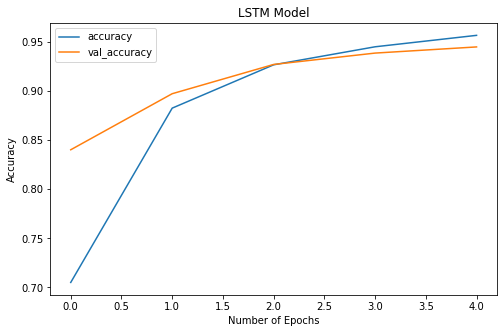

In [ ]:
model_loss_1.plot(figsize = (8,5))
plt.title("LSTM Model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

In [ ]:
model.evaluate(x_train, y_train)

1295/1295 [==============================] - 20s 15ms/step - loss: 0.0713 - accuracy: 0.9797


[0.07129623740911484, 0.9796745777130127]

In [ ]:
model.save_weights('/content/drive/MyDrive/DeGatto Project/EDA + Models/sentiment_weights.h5')
model.save('/content/drive/MyDrive/DeGatto Project/EDA + Models/sentiment.model')

In [ ]:
## AKHOUNAAAAA JOSEPH

from tensorflow.keras.models import load_model
model_loaded = load_model('/content/drive/MyDrive/DeGatto Project/EDA + Models/sentiment.model')

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
stop_words=stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")
nltk.download('punkt')


from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen=200
xpad=pad_sequences(xtokens,padding='post', maxlen=maxlen)

review1 = ['love tracy reese dresses one not petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alterations shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress',
           'absolutely wonderful silky sexy comfortable',
           'ordered dress size xl greyredyellow combination love everything dress comfortable colors cheerful proportions stripes placed works return dress short im comfortable wearing saw photos comes midthigh taller models hoped would mean would kneelength unfortunately short id feel selfconscious dont want deal']


df = pd.DataFrame(review1)

tokens = tokenizer2.texts_to_sequences(df[0].values.tolist())
tokens_pad = pad_sequences(tokens, padding='post', maxlen=maxlen)
mod_pred = model_loaded.predict(tokens_pad)
df_pred = pd.DataFrame(mod_pred, index=review1)
df_pred

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1/1 [==============================] - 6s 6s/step


,0,1,2
love tracy reese dresses one not petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alterations shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress,0.979776,0.002931,0.017294
absolutely wonderful silky sexy comfortable,0.000071,0.000968,0.998961
ordered dress size xl greyredyellow combination love everything dress comfortable colors cheerful proportions stripes placed works return dress short im comfortable wearing saw photos comes midthigh taller models hoped would mean would kneelength unfortunately short id feel selfconscious dont want deal,0.002273,0.082407,0.915320


In [ ]:
review1 = ['love tracy reese dresses one not petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alterations shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress',
           'ordered dress size xl greyredyellow combination love everything dress comfortable colors cheerful proportions stripes placed works return dress short im comfortable wearing saw photos comes midthigh taller models hoped would mean would kneelength unfortunately short id feel selfconscious dont want deal',
           'absolutely wonderful silky sexy comfortable']

df = pd.DataFrame(review1)

df[0].values.tolist()

['love tracy reese dresses one not petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alterations shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress',
 'ordered dress size xl greyredyellow combination love everything dress comfortable colors cheerful proportions stripes placed works return dress short im comfortable wearing saw photos comes midthigh taller models hoped would mean would kneelength unfortunately short id feel selfconscious dont want deal',
 'absolutely wonderful silky sexy comfortable']

In [ ]:
review1 = ['love tracy reese dresses one not petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alterations shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress',
           'ordered dress size xl greyredyellow combination love everything dress comfortable colors cheerful proportions stripes placed works return dress short im comfortable wearing saw photos comes midthigh taller models hoped would mean would kneelength unfortunately short id feel selfconscious dont want deal',
           'absolutely wonderful silky sexy comfortable']

df = pd.DataFrame(review1)

tokens = tokenizer.texts_to_sequences(df[0].values.tolist())
tokens_pad = pad_sequences(tokens, padding='post', maxlen=maxlen)
mod_pred = model_loaded.predict(tokens_pad)
df_pred = pd.DataFrame(mod_pred, index=review1)
df_pred

NameError: ignored